# 파이썬 머신러닝 완벽 가이드
<a href="https://github.com/wikibook/pymldg-rev"><img src="https://user-images.githubusercontent.com/48724872/223235545-161bab0b-f572-46db-8019-fbf7414b828e.jpg" width="400" align = "right"></a>


## Chapter 4. 분류
### 1.  [결정 트리(Decision Tree)](#1.-결정-트리(Decision-Tree))
  * [결정 트리 모델의 특징](#결정-트리-모델의-특징)
  * [결정 트리 모델의 시각화](#결정-트리-모델의-시각화)
  * [결정 트리 과적함(Overfitting)](#결정-트리-과적합(Overfitting))
  * [결정 트리 실습 - 사용자 행동 인식 데이터 세트](#결정-트리-실습---사용자-행동-인식-데이터-세트)

### 2.  [앙상블 학습(Ensemble Learning)](#2.-앙상블-학습(Ensemble-Learning))
  * [앙상블 학습 개요](#앙상블-학습-개요)
  * [보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)](#보팅-유형---하드-보팅(Hard-Voting)과-소프트-보팅(Soft-Voting))
  * [보팅 분류기(Voting Classifier](#보팅-분류기(Voting-Classirfier)

### 3.  [랜덤 포레스트(Random Forest)](#3.-랜덤-포레스트(Random-Forest))
  * [랜덤 포레스트의 개요 및 실습](#랜덤-포레스트의-개요-및-실습)
  * [랜덤 포레스트 하이퍼 파라미터 및 튜닝](#랜덤-포레스트-하이퍼-파라미터-및-튜닝)

### 4.  [GBM(Gradient Boosting Machine)](#4.-GBM(Gradient-Boosting-Machine))
  * [GBM의 개요 및 실습](#GBM의-개요-및-실습)
  * [GBM 하이퍼 파라미터 소개](#GBM-하이퍼-파라미터-소개)

### 5.  [XGBoost(eXtra Gradient Boost)](#5.-XGBoost(eXtra-Gradient-Boost))
  * [XGBoost 설치하기](#XGBoost-설치하기)
  * [파이썬 래퍼 XGBoost 하이퍼 파라미터](#파이썬-래퍼-XGBoost-하이퍼-파라미터)
  * [파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측](#파이썬-래퍼-XGBoost-적용---위스콘신-유방암-예측)
  * [사이킷런 래퍼 XGBoost의 개요 및 적용](#사이킷런-래퍼-XGBoost의-개요-및-적용)

* 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
* 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
* 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
* 근접 거리를 기준으로 하는 최소 근접(Nearesr Neighbor) 알고리즘
* 심층 연결 기반의 신경망(Neural Network)
* 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

# 1. 결정 트리(Decision Tree)

* 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것

<img src=./img/Decision_Tree_Structure.png width=600>

* **규칙 노드(Decision Node)** 로 표시된 노드는 규칙 조건이 되는 것이고, **리프 노드(Leaf Node)** 로 표시된 노드는 결정된 클래스의 값이다
* 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성된다
* 트리(Tree)의 깊이(Depth)가 싶어질수록 과적합으로 이어져 결정 트리의 예측 성능이 저하될 가능성이 높다

<img src=./img/Decision_Tree_Structure_2.png width=600>

* C가 가장 정보 균일도가 높고 그 다음으로 B, 마지막으로 A이다
* 결정 노드는 정보 균일도가 높은 Dataset을 먼저 선택하도록 규칙 조건을 만든다
* 이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수가 있다

1. 정보 이득은 엔트로피라는 개념을 기반으로 한다. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다. 즉, 1 - 엔트로피 지수이다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정한다. 즉, 정보 이득이 높은 속성을 기준으로 분할한다.

2. 지니 계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수이다. 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등하다. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

### 결정 트리 모델의 특징

* 장점
    1. 쉽고 직관적이다
    2. Feature의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다
    

* 단점
    1. 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

### 결정 트리 모델의 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리 -> train_test_split()
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. -> fit()
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

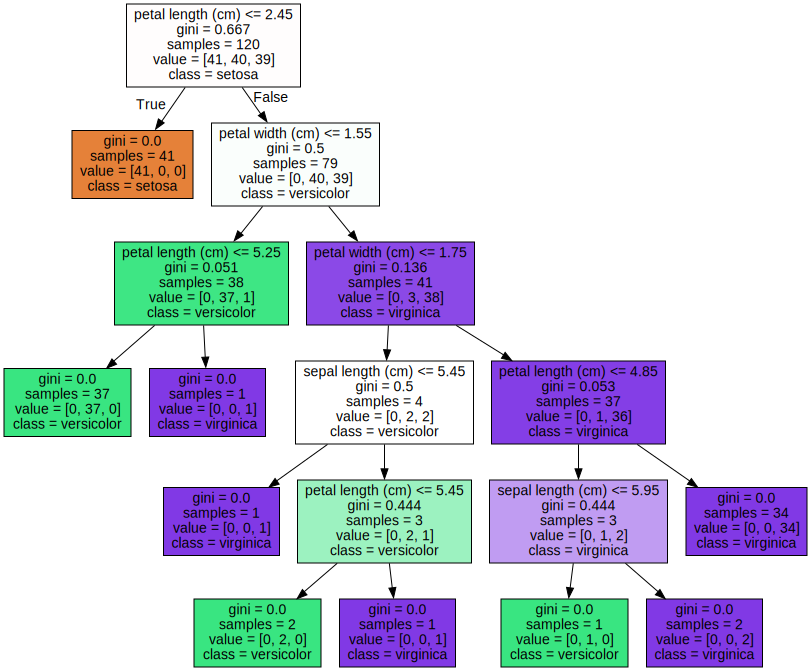

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* Petal Length(cm) <= 2.45와 같이 Feature의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건이다. 이 조건이 없으면 리프 노드이다
* gini는 다음의 value=[ ]로 주어진 데이터 분포에서의 지니 계수이다
* samples는 현 규칙에 해당하는 데이터 건수이다
* value=[ ]는 클래스 값 기반의 데이터 건수이다. 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지고 있으며, 0 : Setosa, 1 : Versicolor, 2 : Virginica 품종을 가리킨다. 만일 Value=[41, 40, 39]라면 클래스 값의 순서로 Setosa 41개, Vesicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미이다

<img src=./img/Decision_Tree_Graph.jpg width=700>

**1번 노드**

* samples = 120개는 전체 데이터가 120개라는 의미
* value=[41, 40, 39]는 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성
* sample 120개가 value=[41, 40, 39] 분포도로 되어 있으므로 지니 계수는 0.667
* petal length (cm) <= 2.45 규칙으로 자식 노드 생성
* class = setosa는 하위 노드를 가질 경우에 Setosa의 개수가 41개로 제일 많다는 의미
   
**2번 노드**

* 41개의 샘플 데이터 모두 Setosa이므로 예측 클래스는 Setosa로 결정
* 지니 계수는 0임

**3번 노드**

* 79개의 샘플 데이터 중 Vesicolor 40개, Virginica 39개로 여전히 지니 계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙 필요
* petal width (cm) <= 1.55 규칙으로 자식 노드 생성
    
**4번 노드**

* 38개의 샘플 데이터 중 Versicolor 37개, Virginicar가 1개로 대부분 Versicolor이다
* 지니 계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virsinica가 혼재돼 있으므로 petal length (cm) <= 5.25라는 새로운 규칙으로 다시 자식 노드 생성
    
**5번 노드**

* 41개의 샘플 데이터 중 Versicolor 3개, Virginica가 38개로 대부분이 Virginica이다
* 지니 계수는 0.136으로 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있으므로 petal width (cm) <= 1.75라는 새로운 규칙으로 다시 자식 노드 생성

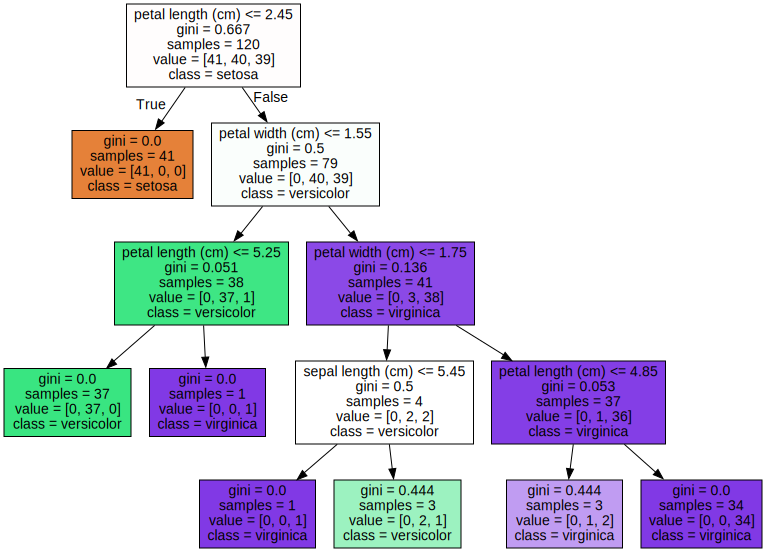

In [4]:
''' min_samples_split = 4 '''
''' 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수 '''

dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4)
dt_clf.fit(X_train , y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

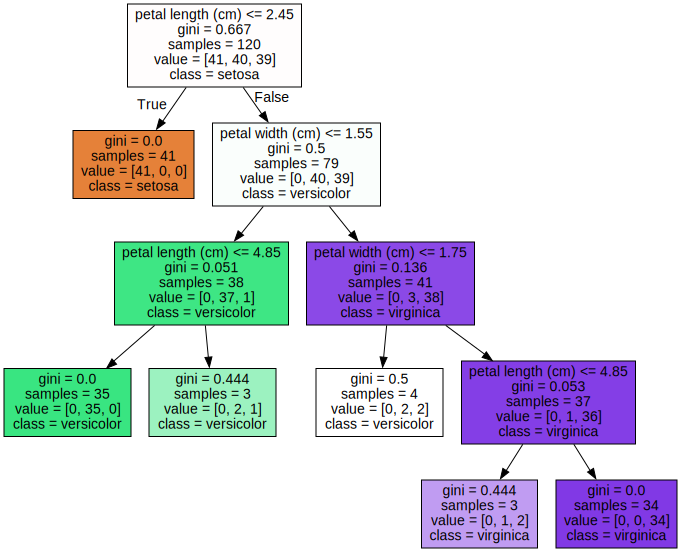

In [5]:
''' min_samples_leaf = 3 '''
''' 분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수를 지정 '''

dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=3)
dt_clf.fit(X_train , y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

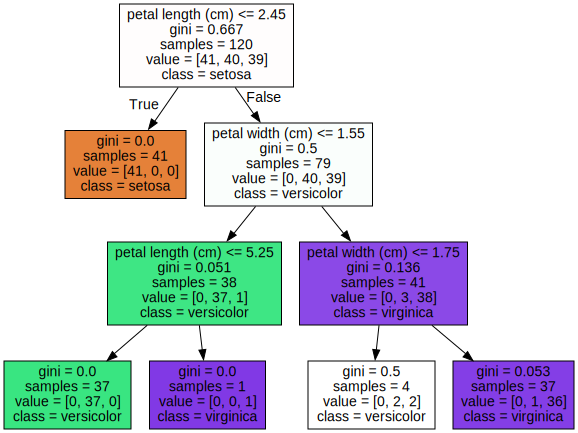

In [6]:
''' max_depth = 3 '''
''' 결정 트리의 최대 트리 깊이 '''

dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)
dt_clf.fit(X_train , y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

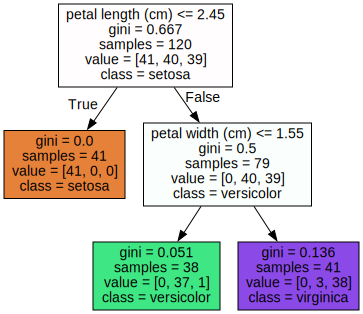

In [7]:
''' max_leaf_nodes = 3 '''
''' 결정 트리의 리프 노드 개수 '''

dt_clf = DecisionTreeClassifier(random_state=156, max_leaf_nodes=3)
dt_clf.fit(X_train , y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

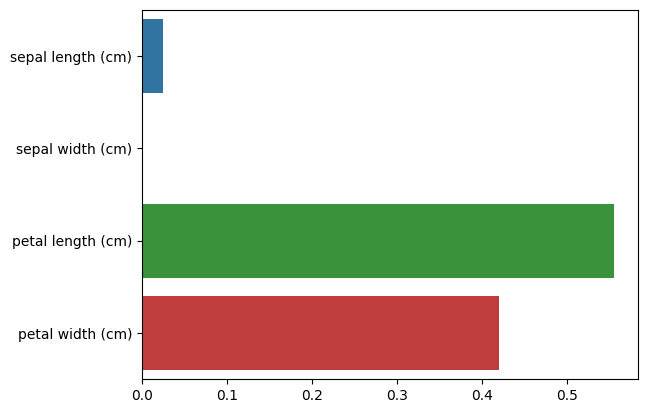

In [9]:
import seaborn as sns
import numpy as np
%matplotlib inline
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)

# feature importance 추출 -> feature_importances_
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### 결정 트리 과적합(Overfitting)

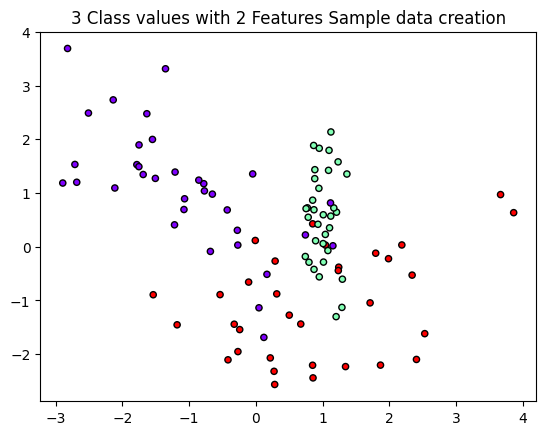

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=20, cmap='rainbow', edgecolor='k')

In [11]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

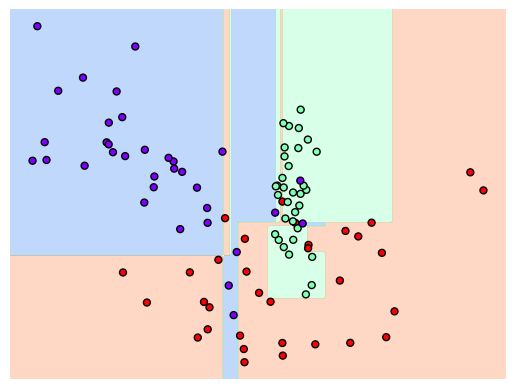

In [12]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

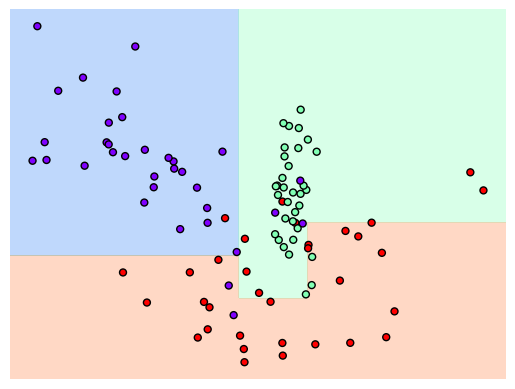

In [13]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./dataset/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [17]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [1]:
''' 중복된 Feature 명에 대해서 원본 Feature 명에 '_1(또는 2)'를 추가하는 함수 '''

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0],  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [2]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./dataset/human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./dataset/human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('./dataset/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./dataset/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./dataset/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [21]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

''' 7352개의 레코드로 561개의 Feature를 가지고 있다 '''
''' Feature는 움직임의 위치에 관련된 속성이므로 float 형의 숫자 형이다 '''

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


' Feature는 움직임의 위치에 관련된 속성이므로 float 형의 숫자 형이다 '

In [22]:
print(y_train['action'].value_counts())

''' 레이블 값은 특정 값으로 왜곡되지 않고 비교적 고르게 분포되어 있다 '''

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


' 레이블 값은 특정 값으로 왜곡되지 않고 비교적 고르게 분포되어 있다 '

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [25]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [26]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]

# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [27]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [28]:
''' best_estimator_ '''
''' 최적 하이퍼 파라미터인 max_depth 8, min_samples_split 16으로 학습 완료된 Estimator 객체 '''
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


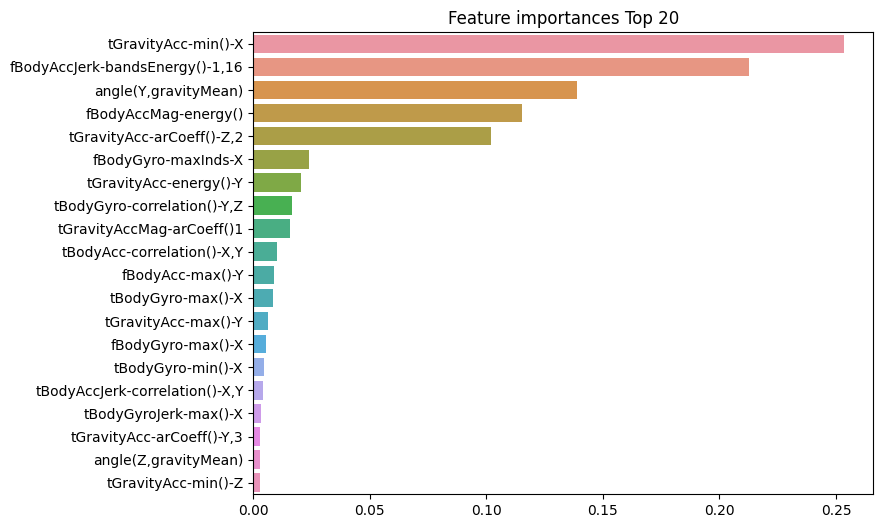

In [29]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 2. 앙상블 학습

### 앙상블 학습 개요

**앙상블 학습(Ensemble Learning**
* 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
  
<br>
  
**앙상블 학습 유형**
<img src=./img/Voting&Bagging.png>
1. 보팅(Voting)
    * 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
    * 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합

2. 배깅(Bagging)
    * 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
    * 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 하고 보팅
    * ex) 랜덤 포레스트

3. 부스팅(Boosting)
    * 여러개의 분류기가 순차적으로 학습하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치(Weight)를 부여하면서 학습과 예측을 진행
    * ex) 그래디언트 부스트, XGBoost, LightGBM

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

<img src=./img/Hard&Soft_Voting.png>

**하드 보팅(Hard Voting)**

* 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
* 다수결 원칙과 비슷

**소프트 보팅(Soft Voting)**

* 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

### 보팅 분류기(Voting Classifier)

In [30]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 위스콘신 유방암 데이터 세트 생성
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [31]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


# 3. 랜덤 포레스트(Random Forest)

### 랜덤 포레스트의 개요 및 실습

**랜덤 포레스트(Random Forest)**
* 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지며, 다양한 영역에서 높은 예측 성능을 보이고 있다
* 결정 트리 알고리즘이 기반 알고리즘이며, 배깅(Bagging) 방식으로 각자의 데이터를 샘플링하여 개별적으로 학습한 후 최종적으로 모든 분류리가 보팅을 통해 예측 결정을 한다

In [32]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./dataset/human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./dataset/human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('./dataset/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./dataset/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./dataset/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [34]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12, 14, 16, 18, 20], 
    'min_samples_leaf' : [4, 6, 8, 10, 12],
    'min_samples_split' : [4, 6, 8, 10]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도: 0.9183


In [35]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=10, min_samples_split=4, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9226


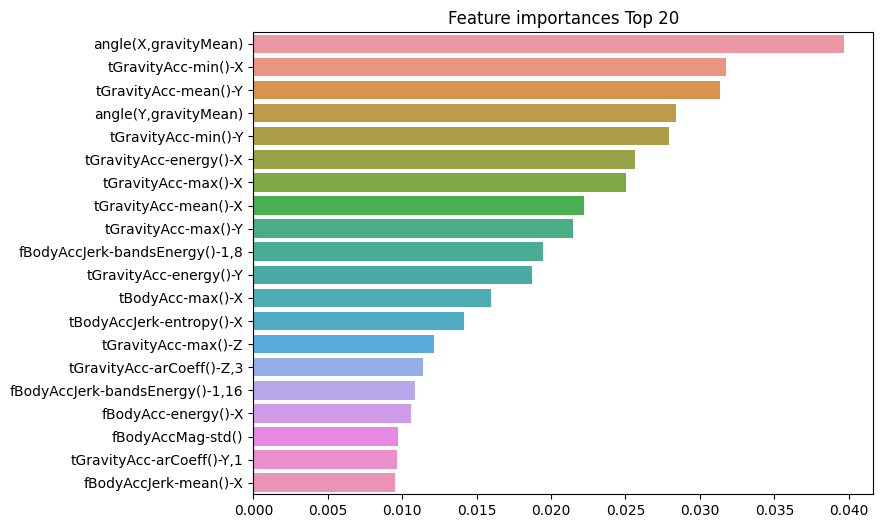

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 4. GBM(Gradient Boosting Machine)

### GBM의 개요 및 실습

**AdaBoost**
<img src=./img/Ada_Boost.png>
* Step 1 : Weak Learner 분류기 1이 데이터 세트를 분류한다
* Step 2 ~ Step 5 : 이전 단계의 분류기가 잘못 분류한 데이터에 가중치를 부여하고 다시 데이터 세트를 분류한다
* Step 6 : 각 과정에서 사용한 Weak Learner 분류기를 모두 결합하여 분류를 하게 되고, 1개의 Weak Learner 분류기를 사용할 때보다 정확도가 높아진다

<br>

**GBM(Gradient Boosting Machine)**
* AdaBoost와 유사하지만 가중치 업데이트를 경사하강법(Gradient Descent)을 이용하는 것이 가장 큰 차이다
* CART 기반의 다른 알고리즘과 마찬가지로 분류 뿐만 아니라 회귀도 가능하다

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

NameError: name 'accuracy_score' is not defined

In [5]:
from sklearn.metrics import accuracy_score

gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 1626.5 초 


### GBM 하이퍼 파라미터 소개

In [6]:
from sklearn.model_selection import GridSearchCV

# 'n_estimators' -> weak learner의 개수
# 'learning_rate' -> GBM이 학습을 진행할 때마다 적용하는 학습률
params = {
    'n_estimators':[100, 500],
    'learning_rate' : [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


KeyboardInterrupt: 

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

# 5. XGBoost(eXtra Gradient Boost)

### XGBoost 개요

**XGBoost**
* 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나이다
* GBM에 기반하고 있지만, GBM의 단점은 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결
* 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습할 수 있다

### 파이썬 래퍼 XGBoost 하이퍼 파라미터

* **일반 파라미터**

    일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없다.
    
<br>
    
* **부스터 파라미터**

    트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭하며 대부분의 파라미터들은 여기에 속한다.
    
<br>

* **학습 태스크 파라미터**

    학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터이다.

**주요 일반 파라미터**

* **booster**

    gbtree(tree based model) 또는 gblinear(linear model) 선택, default는 gbtree이다
    
<br>

* **silent**

    default는 0이며, 출력 메세지를 나타내고 싶지 않을 경우 1로 설정한다.

<br>

* **nthread**

    CPU의 실행 스레드 개수를 조정하며, default는 CPU의 전체 스레드를 다 사용하는 것이다. 멀티 코어/스레트 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션을 구동하는 경우에 변경한다.

**주요 부스터 파라미터**

* **eta** [default=0.3, alias: learning_rate]

    GBM의 학습률(learning rate)과 같은 파라미터이다. 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값, 파이썬 래퍼 기반의 xgboost를 이용할 경우 default는 0.3이고 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며, default는 0.1이다. 보통은 0.01 ~ 0.2 사이의 값을 선호한다.

<br>

* **num_boost_rounds**
    
    GBM의 n_estimators와 같은 파라미터이다.

<br>

* **min_child_weight** [default=1]

    트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합, min_child_weight가 클수록 분할을 자제한다. 과적합을 조절하기 위해 사용된다.

<br>

* **gamma** [default=0, alias: min_split_loss]

    트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값이다. 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리한다. 값이 클수록 과적합 감소 효과가 있다.

<br>

* **max_depth** [default=6]
    
    트리 기반 알고리즘의 max_depth와 같다. 0을 지정하면 깊이에 제한이 없다. max_depth가 높으면 특정 피쳐 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용한다.

<br>

* **sub_sample** [default=1]
    
    GBM의 subsample과 동일하다. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정한다. sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용한다. 0에서 1사이의 값이 가능하나 일반적으로 0.5 ~ 1 사이의 값을 사용한다.

<br>

* **colsample_bytree** [default=1]
    
    GBM의 max_feature와 유사하다. 트리 생성에 필요한 피처(column)를 임의로 샘플링하는 데 사용된다. 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용하다.

<br>

* **lambda** [default=1, alias: reg_lambda]
    
    L2 Regularation 적용 값이다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.

<br>

* **alpha** [default=0, alias: reg_alpha]
    
    L1 Regularization 적용 값이다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.

<br>

* **scale_pos_weight** [default=1]

    특정 값으로 치우친 비대칭한 클래스로 구성된 datase의 균형을 유지하기 위한 파라미터이다.


**학습 태스크 파라미터**

* **objective**
    
    최솟값을 가져야할 손실 함수를 정의합니다. XGBoost는 많은 유형의 손실함수를 사용할 수 있습니다. 주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라진다.

<br>

* **binary:logitic**
    
    이진 분류일 때 적용한다.

<br>

* **multi:softmax**
    
    다중 분류일 때 적용한다. 손실함수가 multi:softmax일 경우에는 label 클래스의 개수인 num_class parameter를 지정해야 한다.

<br>

* **multi:softprob**
    
    multi:softmax와 유사하나 개별 label 클래스의 해당되는 예측 확률을 반환한다.

<br>

* **eval_metric**
    
    검증에 사용되는 함수를 정의한다. defalut는 회귀인 경우는 rmse, 분류일 경우에는 error이다. 다음은 eval_metric의 값 유형들이다.

<br>

* **rmse**

    Root Mean Square Error

<br>

* **mae**

    Mean Absolute Error

<br>

* **logloss**

    Negative log-likelihood

<br>

* **error**

    Binary classification error rate (0.5 threshold)

<br>

* **merror**

    Multiclass classification error rate

<br>

* **mloglose**

    Multiclass logloss

<br>

* **auc**
    
    Area under the curve

**과적합 문제 해결방안**

* eta 값을 낮춘다(0.01 ~ 0.1). 그리고 eta 값을 낮추면 num_round(또는 n_estimator)는 반대로 높여준다.
* max_depth 값을 낮춘다.
* min_child_weight 값을 높인다.
* gamma 값을 높인다.
* subsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있다.

### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [6]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [8]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [9]:
params = {'max_depth':3,
          'eta': 0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

In [10]:
# train 데이터 셋은 'train'   evaluation(test) 데이터 셋은 'eval'로 평가. 
wlist = [(dtrain,'train'), (dtest,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	train-logloss:0.11729	eval-logloss:0.16766
[20]	train-logloss:0.10969	eval-logloss:0.15820
[2

[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08695
[177]	train-logloss:0.00695	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:0.00687	eval-logloss:0.08683
[183]	train-logloss:0.00685	eval-logloss:0.08658
[184]	train-logloss:0.00683	eval-logloss:0.08659
[185]	train-logloss:0.00681	eval-logloss:0.08661
[186]	train-logloss:0.00680	eval-logloss:0.08637
[187]	train-logloss:0.00678	eval-logloss:0.08637
[188]	train-logloss:0.00676	eval-logloss:0.08630
[189]	train-logloss:0.00675	eval-logloss:0.08610
[190]	train-logloss:

In [11]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [13]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

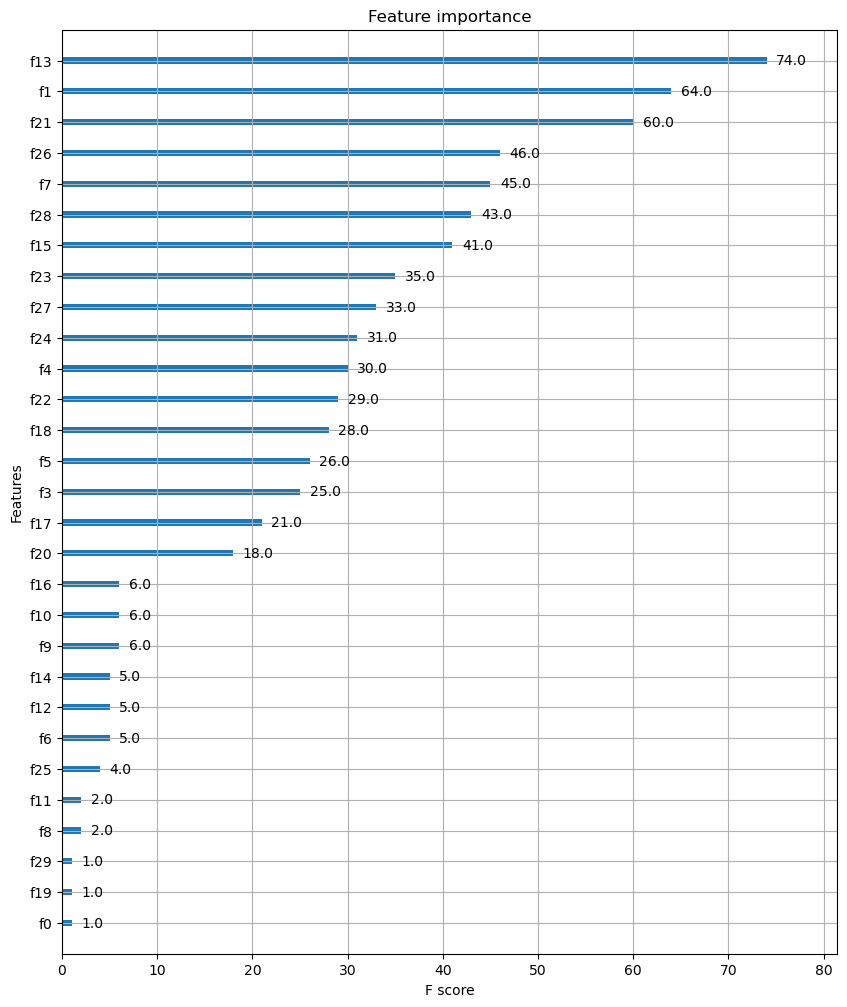

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### 사이킷런 래퍼 XGBoost의 개요 및 적용

* eta -> learning_rate
* sub_sample -> subsample
* lambda -> reg_lambda
* alpha -> reg_alpha

In [29]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [30]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [31]:
''' n_estimators가 400이라 400번 반복해야 하지만 211번째에 logloss가 0.08559로 가장 낮고 '''
''' 추후 100번 반복하여 311번째까지 더 이상 성능이 향상되지 않아 학습이 조기 종료'''

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08620
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08645
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [32]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [35]:
''' early_stpping_rounds를 10으로 하면 10번 반복한느 동안 성능 평가지표가 향상되지 않으면 '''
''' 반복이 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있다 '''

# early_stopping_rounds를 10으로 설정하고 재 학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

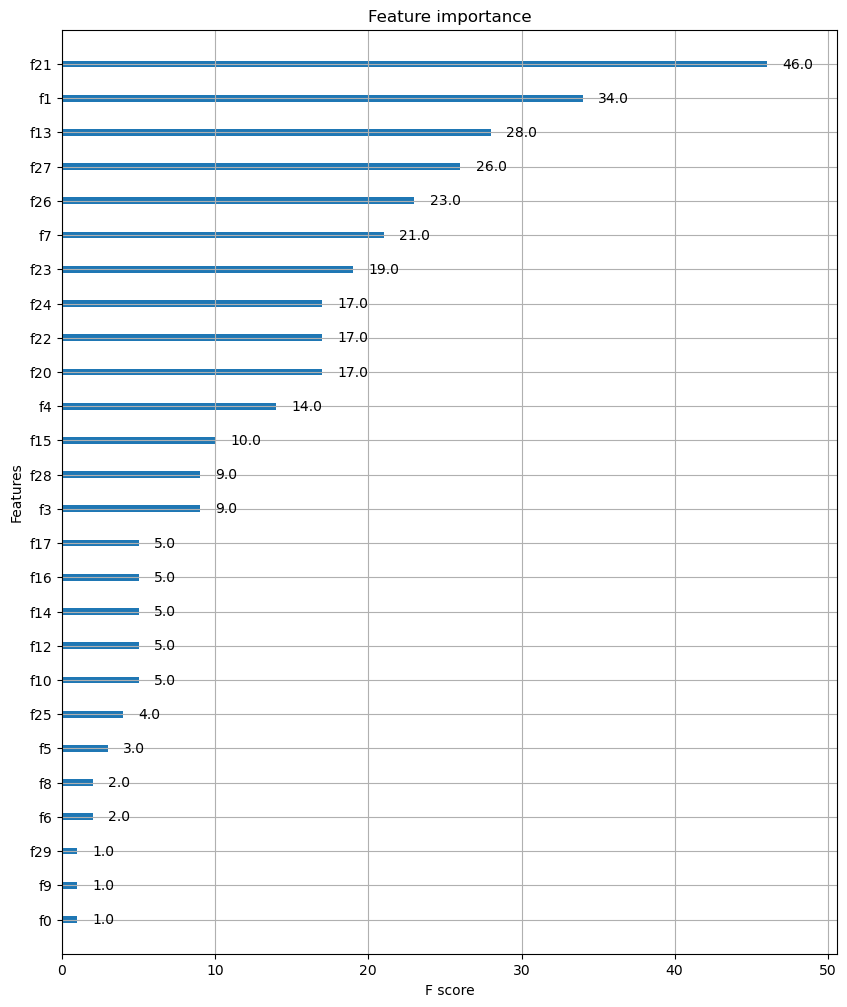

In [34]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)